In [1]:
import pandas as pd


In [5]:
df=pd.read_csv('heart.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
from sklearn.model_selection import train_test_split
X,y =df.drop('target',axis=1),df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=9)

### Scale-Insensitive


In [10]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier()
forest.fit(X_train,y_train)


RandomForestClassifier()

In [11]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)


GaussianNB()

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)


GradientBoostingClassifier()

### Scale-Sensitive

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [16]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train_scaled,y_train)

LogisticRegression()

In [17]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [18]:
forest.score(X_test,y_test)

0.9853658536585366

In [19]:
nb_clf.score(X_test,y_test)

0.8463414634146341

In [20]:
gb_clf.score(X_test,y_test)

0.9707317073170731

In [21]:
knn.score(X_test_scaled,y_test)

0.8536585365853658

In [22]:
log.score(X_test_scaled,y_test)

0.8731707317073171

In [24]:
svc.score(X_test_scaled,y_test)

0.9341463414634147

In [27]:
from sklearn.metrics import recall_score
y_preds=forest.predict(X_test)
print('Forest:',recall_score(y_test,y_preds))

y_preds=nb_clf.predict(X_test)
print('NB:',recall_score(y_test,y_preds))

y_preds=gb_clf.predict(X_test)
print('GB:',recall_score(y_test,y_preds))

y_preds=knn.predict(X_test_scaled)
print('KNN:',recall_score(y_test,y_preds))

y_preds=log.predict(X_test_scaled)
print('LOG:',recall_score(y_test,y_preds))

y_preds=svc.predict(X_test_scaled)
print('SVC:',recall_score(y_test,y_preds))



Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
LOG: 0.92018779342723
SVC: 0.9530516431924883


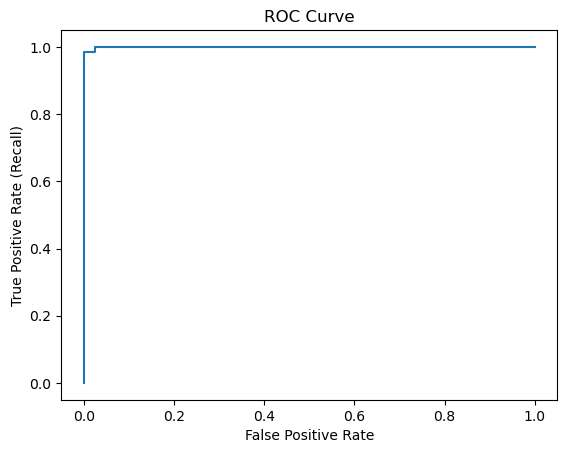

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_probs=forest.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()


In [29]:
roc_auc_score(y_test,y_probs)

0.9996425252019733

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


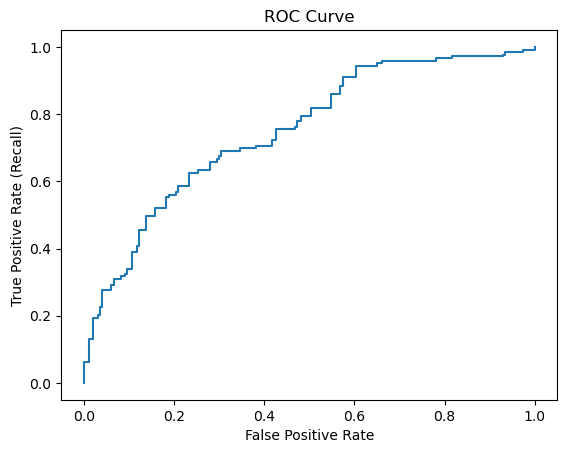

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_probs=log.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()


In [31]:
roc_auc_score(y_test,y_probs)

0.7505064226305379

### Feature Importances

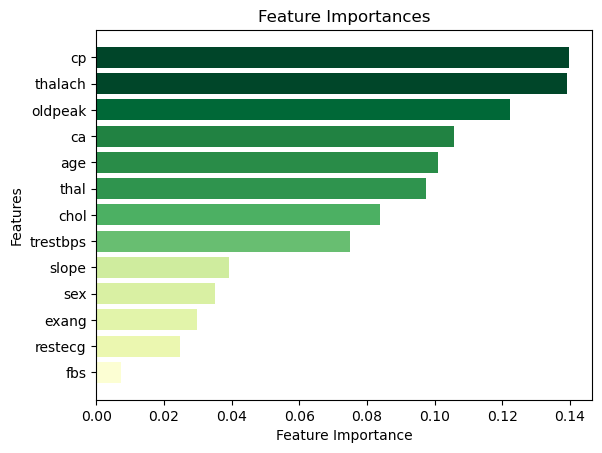

In [33]:
import numpy as np
feature_importances=forest.feature_importances_
features=forest.feature_names_in_
sorted_idx=np.argsort(feature_importances)
sorted_features=features[sorted_idx]
sorted_importances=feature_importances[sorted_idx]
colors=plt.cm.YlGn(sorted_importances/max(sorted_importances))
plt.barh(sorted_features,sorted_importances,color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

<Axes: >

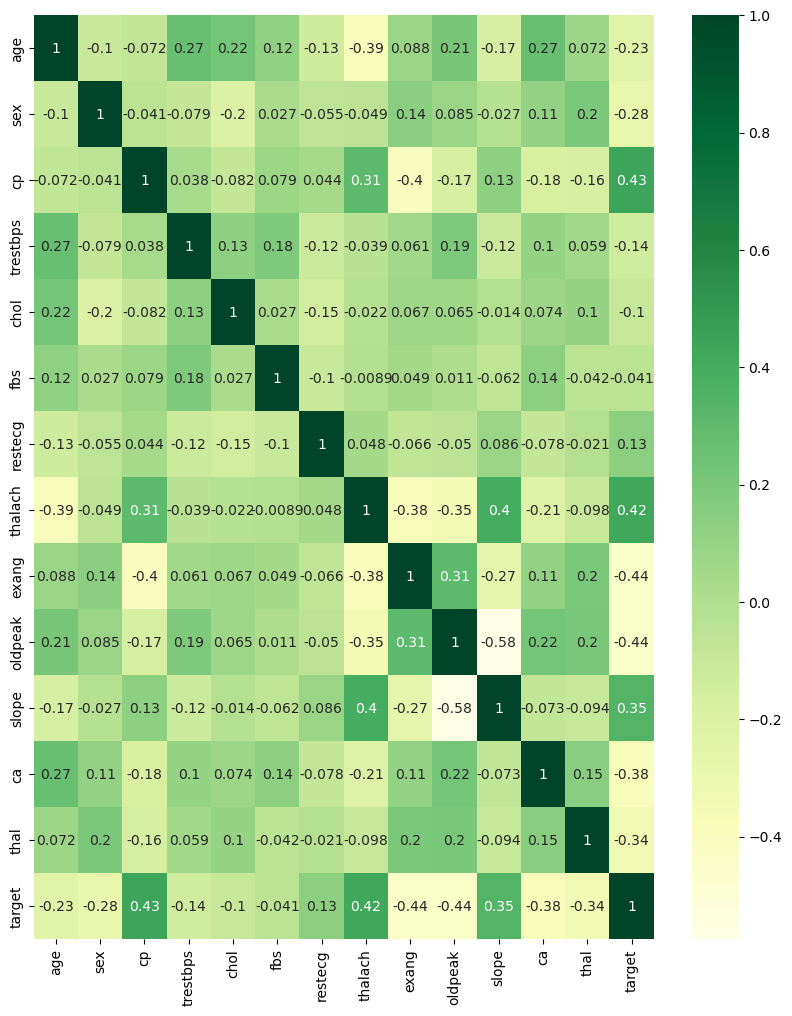

In [35]:
import seaborn as sns
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True,cmap= 'YlGn')